In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

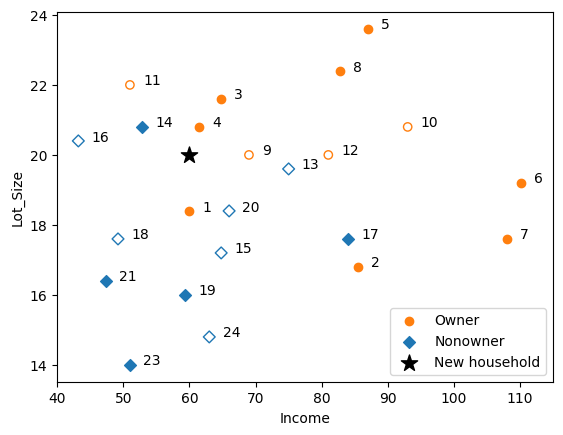

In [3]:
mower_df = pd.read_csv("D:/dmba/RidingMowers.csv")
mower_df['Number'] = mower_df.index + 1

trainData, validData = train_test_split(mower_df, test_size=0.4, random_state=26)

newHousehold = pd.DataFrame([{'Income':60, 'Lot_Size':20}])

def plotDataset(ax, data, showLabel=True, **kwargs):
    subset = data.loc[data['Ownership']=='Owner']
    ax.scatter(subset.Income, subset.Lot_Size, marker='o',
               label='Owner' if showLabel else None, color='C1', **kwargs)
    subset = data.loc[data['Ownership']=='Nonowner']
    ax.scatter(subset.Income, subset.Lot_Size, marker='D',
               label='Nonowner' if showLabel else None, color='C0', **kwargs)
    plt.xlabel('Income')
    plt.ylabel('Lot_Size')
    for _, row in data.iterrows():
        ax.annotate(row.Number, (row.Income + 2, row.Lot_Size))

fig, ax = plt.subplots()
plotDataset(ax, trainData)
plotDataset(ax, validData, showLabel=False, facecolors='none')
ax.scatter(newHousehold.Income, newHousehold.Lot_Size, marker='*', label='New household', color='black', s=150)

plt.xlabel('Income')
plt.ylabel('Lot_Size')
ax.set_xlim(40, 115)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=4)
plt.show()

In [5]:
predictors = ['Income', 'Number']
outcome = []

scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['Income', 'Lot_Size']])

mowerNorm = pd.concat([pd.DataFrame(scaler.transform(mower_df[['Income', 'Lot_Size']]), columns=['zIncome', 'zLot_Size']), mower_df[['Ownership', 'Number']]], axis=1)
trainNorm = mowerNorm.iloc[trainData.index]
validNorm = mowerNorm.iloc[validData.index]
newHouseholdNorm = pd.DataFrame(scaler.transform(newHousehold),
                           columns=['zIncome', 'zLot_Size'])

from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=3)
knn.fit(trainNorm.iloc[:, 0:2])
distances, indices = knn.kneighbors(newHouseholdNorm)
print(distances)
print(indices)
print(trainNorm)
trainNorm.iloc[indices[0], :]

[[0.31358009 0.44793643 0.61217726]]
[[1 8 7]]
     zIncome  zLot_Size Ownership  Number
5   1.797760   0.131181     Owner       6
3  -0.409776   0.743358     Owner       4
7   0.557724   1.355535     Owner       8
20 -1.050235  -0.940129  Nonowner      21
18 -0.505164  -1.093174  Nonowner      19
2  -0.259882   1.049447     Owner       3
4   0.748499   1.814668     Owner       5
0  -0.477910  -0.174908     Owner       1
13 -0.804953   0.743358  Nonowner      14
22 -0.886713  -1.858395  Nonowner      23
1   0.680365  -0.787085     Owner       2
16  0.612231  -0.480996  Nonowner      17
6   1.702373  -0.480996     Owner       7
21 -1.704320  -0.021863  Nonowner      22


,zIncome,zLot_Size,Ownership,Number
3,-0.409776,0.743358,Owner,4
13,-0.804953,0.743358,Nonowner,14
0,-0.477910,-0.174908,Owner,1


In [6]:
train_X = trainNorm[['zIncome', 'zLot_Size']]
train_y = trainNorm['Ownership']
valid_X = validNorm[['zIncome', 'zLot_Size']]
valid_y = validNorm['Ownership']

results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k':k, 
        'accuracy_score':accuracy_score(valid_y, knn.predict(valid_X))
    })

results = pd.DataFrame(results)
print(results)

     k  accuracy_score
0    1             0.6
1    2             0.7
2    3             0.8
3    4             0.9
4    5             0.7
5    6             0.9
6    7             0.9
7    8             0.9
8    9             0.9
9   10             0.8
10  11             0.8
11  12             0.9
12  13             0.4
13  14             0.4


c:\Users\USER\anaconda3\envs\Pytorch\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\USER\anaconda3\envs\Pytorch\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [7]:
mower_X = mowerNorm[['zIncome', 'zLot_Size']]
mower_y = mowerNorm['Ownership']
knn = KNeighborsClassifier(n_neighbors=4).fit(mower_X, mower_y)

distances, indices = knn.kneighbors(newHouseholdNorm)
print(knn.predict(newHouseholdNorm))
print('Distances', distances)
print('Indices', indices)
print(mowerNorm.iloc[indices[0], :])

['Owner']
Distances [[0.31358009 0.40880312 0.44793643 0.61217726]]
Indices [[ 3  8 13  0]]
     zIncome  zLot_Size Ownership  Number
3  -0.409776   0.743358     Owner       4
8  -0.069107   0.437269     Owner       9
13 -0.804953   0.743358  Nonowner      14
0  -0.477910  -0.174908     Owner       1
